In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
url = 'https://www.basketball-reference.com/teams/ATL/players.html'
r = requests.get(url)

In [3]:
soup = BeautifulSoup(r.text, 'html.parser')

In [4]:
links = []
for link in soup.find_all('a'):
    if (link['href'].startswith('/players')) and len(link['href']) > 10:
        links.append(link.get('href'))

In [5]:
len(links)

616

In [6]:
links2 = links[0:4]

In [12]:
base_url = 'https://www.basketball-reference.com'

In [13]:
search_word = 'Position:'

In [14]:
import time
player = []
info = []
for web in links2:
    time.sleep(2)
    r = requests.get(base_url + web)
    if r.ok:
        soup = BeautifulSoup(r.text, 'html.parser')
        name = soup.find('h1').text
        p_tag = soup.find(lambda tag: tag.name=='p' and search_word in tag.text)
        if p_tag:
            info.append(p_tag.text)
            player.append(name)
        else:
            info.append('No info')
            player.append(name)


In [15]:
len(info)

4

In [16]:
info

['\n\n  Position:\n  \n  Power Forward, Small Forward, and Center\n\n\n  \n  ▪\n  \n  \n  Shoots:\n  \n  Right\n',
 '\n\n  Position:\n  \n  Small Forward\n\n\n  \n  ▪\n  \n  \n  Shoots:\n  \n  Right\n',
 '\n\n  Position:\n  \n  Point Guard\n\n\n  \n  ▪\n  \n  \n  Shoots:\n  \n  Right\n',
 '\n\n  Position:\n  \n  Center\n\n\n  \n  ▪\n  \n  \n  Shoots:\n  \n  Right\n']

In [19]:
player = [name.strip() for name in player]

In [20]:
pd.DataFrame({'info':info, 'player':player})

,info,player
0,"\n\n Position:\n \n Power Forward, Small Fo...",Shareef Abdur-Rahim
1,\n\n Position:\n \n Small Forward\n\n\n \n...,Don Adams
2,\n\n Position:\n \n Point Guard\n\n\n \n ...,Jaylen Adams
3,\n\n Position:\n \n Center\n\n\n \n ▪\n ...,Derrick Alston


In [19]:
len(info)

4

In [20]:
info

['\n\n  Position:\n  \n  Power Forward, Small Forward, and Center\n\n\n  \n  ▪\n  \n  \n  Shoots:\n  \n  Right\n',
 '6-6,\xa0210lb\xa0(198cm,\xa095kg) ',
 '6-0,\xa0225lb\xa0(183cm,\xa0102kg) ',
 '\nBorn: \n\nAugust 20,\n            1972\n\n\n    in\xa0Bronx,\xa0New York\nus\n']

In [22]:
len(true_url)

4

In [32]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

url = 'https://www.basketball-reference.com/teams/ATL/players.html'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')
links = []

for link in soup.find_all('a'):
    if link['href'].startswith('/players') and len(link['href']) > 10:
        links.append(link.get('href'))

links2 = links[0:4]
base_url = 'https://www.basketball-reference.com'
search_word = 'Position:'

player = []
positions = []
shoots = []

for web in links:
    time.sleep(2)
    r = requests.get(base_url + web)

    if r.ok:
        soup = BeautifulSoup(r.text, 'html.parser')
        name = soup.find('h1').text.strip()  # Remove leading and trailing whitespaces, including '\n'
        p_tag = soup.find(lambda tag: tag.name == 'p' and search_word in tag.text)

        if p_tag:
            info_text = p_tag.text
            info_cleaned = ' '.join(info_text.replace(search_word, '').split())  # Remove newline characters
            info_list = [info.strip() for info in info_cleaned.split(',')]

            # Extracting the entire position
            position = info_list[0].strip()

            # Extracting the 'Right' or 'Left' value for shoots
            shoots_value = next((info.strip().split()[-1] for info in info_list if 'Shoots' in info), 'No info')

            player.append(name)
            positions.append(position)
            shoots.append(shoots_value)
        else:
            player.append(name)
            positions.append('No info')
            shoots.append('No info')

# Creating DataFrame
df = pd.DataFrame({'player': player, 'position': positions, 'shoots': shoots})
df['position'] = df['position'].apply(lambda x: x.split()[0])  # Extract only the first word from the position column
print(df)




                    player  position shoots
0      Shareef Abdur-Rahim     Power  Right
1                Don Adams     Small  Right
2             Jaylen Adams     Point  Right
3           Derrick Alston    Center  Right
4            Greg Anderson     Power  Right
..                     ...       ...    ...
611  Giannis Antetokounmpo     Power  Right
612             Chris Paul     Point  Right
613           James Harden  Shooting   Left
614          Stephen Curry     Point  Right
615           Kevin Durant     Small  Right

[616 rows x 3 columns]


In [39]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

url = 'https://www.basketball-reference.com/teams/ATL/players.html'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')
links = []

for link in soup.find_all('a'):
    if link['href'].startswith('/players') and len(link['href']) > 10:
        links.append(link.get('href'))

links = links[:-19]
links2 = links[-4:]
base_url = 'https://www.basketball-reference.com'
search_word = 'Position:'

player = []
positions = []
shoots = []

for web in links:
    time.sleep(2)
    r = requests.get(base_url + web)

    if r.ok:
        soup = BeautifulSoup(r.text, 'html.parser')
        name = soup.find('h1').text.strip()  # Remove leading and trailing whitespaces, including '\n'
        p_tag = soup.find(lambda tag: tag.name == 'p' and search_word in tag.text)

        if p_tag:
            info_text = p_tag.text
            info_cleaned = ' '.join(info_text.replace(search_word, '').split())  # Remove newline characters
            info_list = [info.strip() for info in info_cleaned.split(',')]

            # Extracting the entire position
            position = info_list[0].strip()

            # Extracting the 'Right' or 'Left' value for shoots
            shoots_value = next((info.strip().split()[-1] for info in info_list if 'Shoots' in info), 'No info')

            player.append(name)
            positions.append(position)
            shoots.append(shoots_value)
        else:
            player.append(name)
            positions.append('No info')
            shoots.append('No info')

# Creating DataFrame
df = pd.DataFrame({'player': player, 'position': positions, 'shoots': shoots})
df['position'] = df['position'].apply(lambda x: x.split()[0])  # Extract only the first word from the position column

df.to_csv('basketball_player_info2.csv', index=False)



In [41]:
import pandas as pd

# URL for the Atlanta Hawks players page
team_url = 'https://www.basketball-reference.com/teams/ATL/players.html'

# Read the HTML table into a DataFrame
df_player_data = pd.read_html(team_url)[0]

# Display the resulting DataFrame
print(df_player_data.head())

# Save the DataFrame to a CSV file
df_player_data.to_csv('basketball_player_data.csv', index=False)

  Unnamed: 0_level_0   Unnamed: 1_level_0 Unnamed: 2_level_0  \
                  Rk               Player               From   
0                  1  Shareef Abdur-Rahim               2002   
1                  2            Don Adams               1972   
2                  3         Jaylen Adams               2019   
3                  4       Derrick Alston               1997   
4                  5        Greg Anderson               1995   

  Unnamed: 3_level_0 Unnamed: 4_level_0 Totals                         ...  \
                  To                Yrs      G    MP    FG   FGA   3P  ...   
0               2004                  3    211  8023  1547  3270   47  ...   
1               1973                  2     74  2106   315   817  NaN  ...   
2               2019                  1     34   428    38   110   25  ...   
3               1997                  1      2    11     0     5    0  ...   
4               1998                  2    101  1020    93   185    0  ...   

    

In [55]:
import pandas as pd

# Read the first DataFrame from the CSV file
df_player_data = pd.read_csv('basketball_player_data.csv')

# Display the columns of the first DataFrame
print("Columns of df_player_data before modification:")
print(df_player_data.columns)

# Rename the 'Unnamed: 1_level_0' column to 'player'
df_player_data = df_player_data.rename(columns={'Unnamed: 1_level_0': 'player'})

# Display the modified columns of the first DataFrame
print("\nColumns of df_player_data after modification:")
print(df_player_data.columns)





Columns of df_player_data before modification:
Index(['Unnamed: 0_level_0', 'Unnamed: 1_level_0', 'Unnamed: 2_level_0',
       'Unnamed: 3_level_0', 'Unnamed: 4_level_0', 'Totals', 'Totals.1',
       'Totals.2', 'Totals.3', 'Totals.4', 'Totals.5', 'Totals.6', 'Totals.7',
       'Totals.8', 'Totals.9', 'Totals.10', 'Totals.11', 'Totals.12',
       'Totals.13', 'Totals.14', 'Totals.15', 'Shooting', 'Shooting.1',
       'Shooting.2', 'Per Game', 'Per Game.1', 'Per Game.2', 'Per Game.3'],
      dtype='object')

Columns of df_player_data after modification:
Index(['Unnamed: 0_level_0', 'player', 'Unnamed: 2_level_0',
       'Unnamed: 3_level_0', 'Unnamed: 4_level_0', 'Totals', 'Totals.1',
       'Totals.2', 'Totals.3', 'Totals.4', 'Totals.5', 'Totals.6', 'Totals.7',
       'Totals.8', 'Totals.9', 'Totals.10', 'Totals.11', 'Totals.12',
       'Totals.13', 'Totals.14', 'Totals.15', 'Shooting', 'Shooting.1',
       'Shooting.2', 'Per Game', 'Per Game.1', 'Per Game.2', 'Per Game.3'],
      dtyp

In [57]:
import pandas as pd

# Read the first DataFrame from the CSV file
df_player_data = pd.read_csv('basketball_player_data.csv')

df_player_data = df_player_data.rename(columns={'Unnamed: 1_level_0': 'player'})

# Your second DataFrame creation code
df = pd.read_csv('basketball_player_info2.csv')


# Assuming you have the second DataFrame stored in the variable df
# Merge the two DataFrames on the 'player' column
merged_df = pd.merge(df_player_data, df, on='player', how='left')

# Save the merged DataFrame to a CSV file
merged_df.to_csv('merged_basketball_data.csv', index=False)

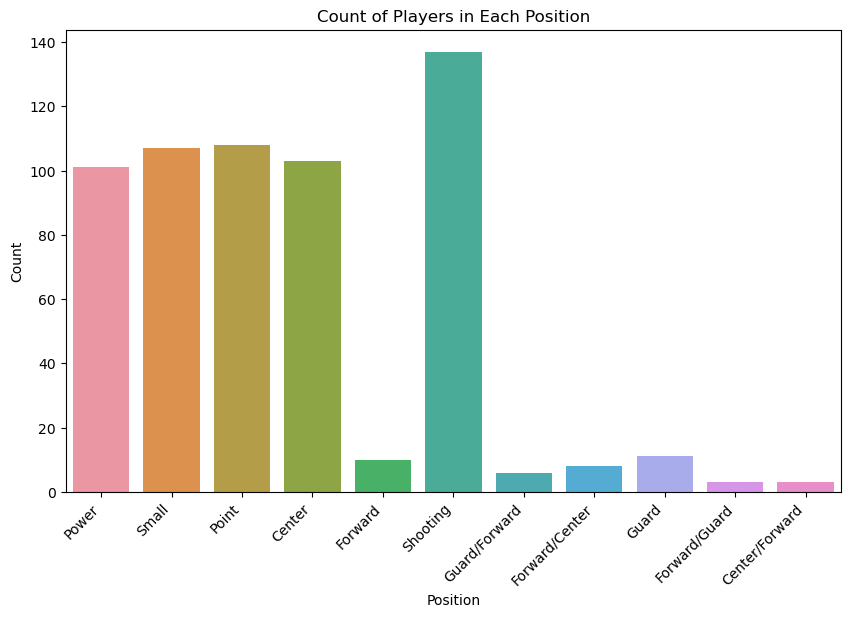

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_df' is the merged DataFrame
# Modify column names based on your actual data

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='position', data=merged_df)
plt.title('Count of Players in Each Position')
plt.xlabel('Position')
plt.ylabel('Count')

# Rotate x-labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()


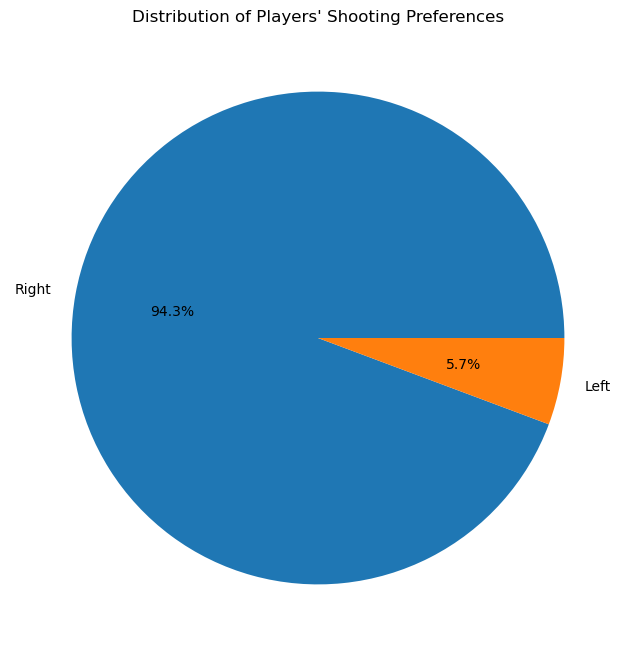

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
merged_df['shoots'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Players\' Shooting Preferences')
plt.ylabel('')
plt.show()

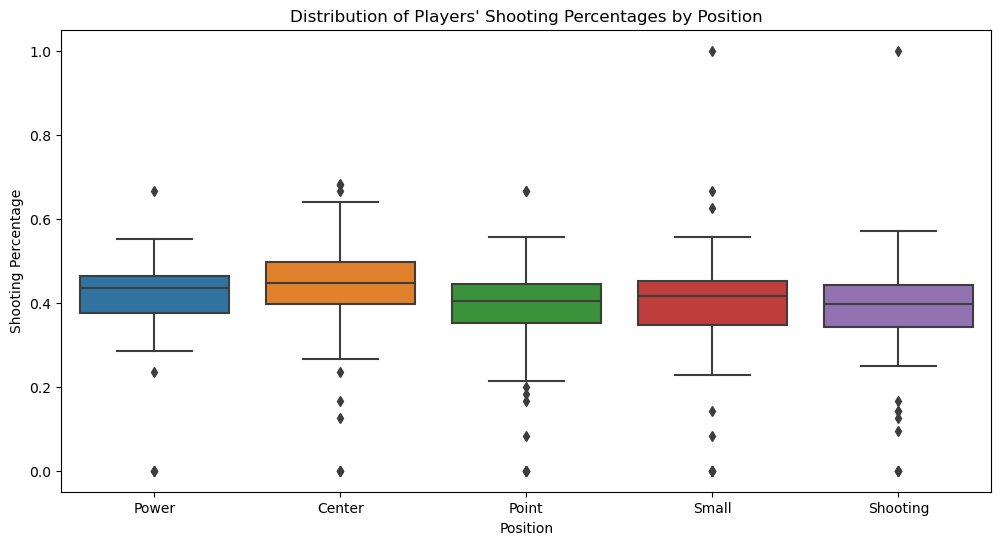

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

merged_df['Shooting'] = pd.to_numeric(merged_df['Shooting'], errors='coerce')
# Specify the positions you want to include
selected_positions = ['Point', 'Shooting', 'Small', 'Power', 'Center']

# Filter the DataFrame based on selected positions
filtered_df = merged_df[merged_df['position'].isin(selected_positions)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='position', y='Shooting', data=filtered_df)
plt.title('Distribution of Players\' Shooting Percentages by Position')
plt.xlabel('Position')
plt.ylabel('Shooting Percentage')
plt.show()

/var/folders/9s/91xgb6012ms7r60_1x0yk4cm0000gp/T/ipykernel_7970/1084576903.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


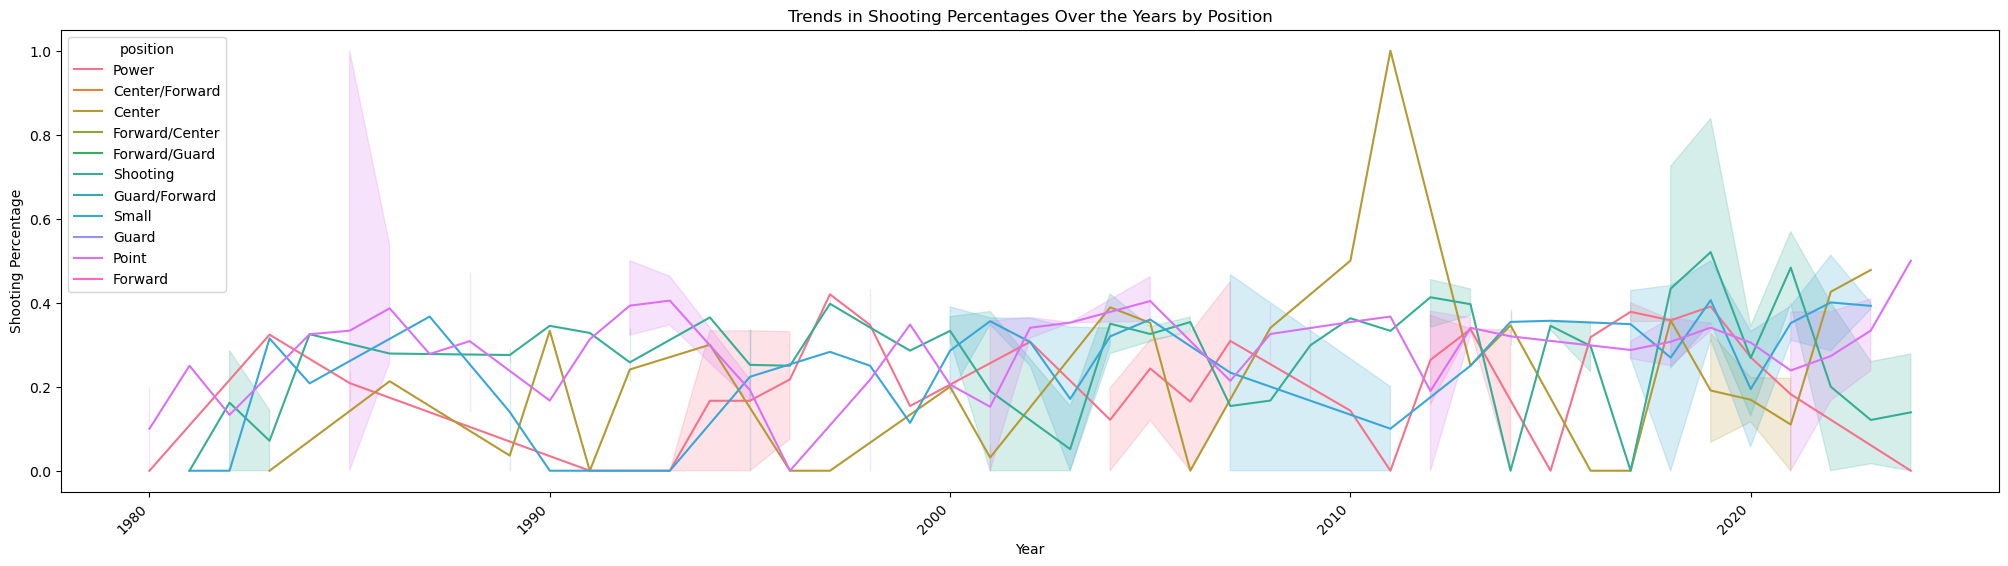

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Unnamed: 2_level_0' column to numeric
merged_df['Year'] = pd.to_numeric(merged_df['Unnamed: 2_level_0'], errors='coerce')

# Sort the DataFrame by the 'Year' column
merged_df = merged_df.sort_values('Year')

plt.figure(figsize=(25, 6))
ax = sns.lineplot(x='Year', y='Shooting.1', hue='position', data=merged_df)
plt.title('Trends in Shooting Percentages Over the Years by Position')
plt.xlabel('Year')
plt.ylabel('Shooting Percentage')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()


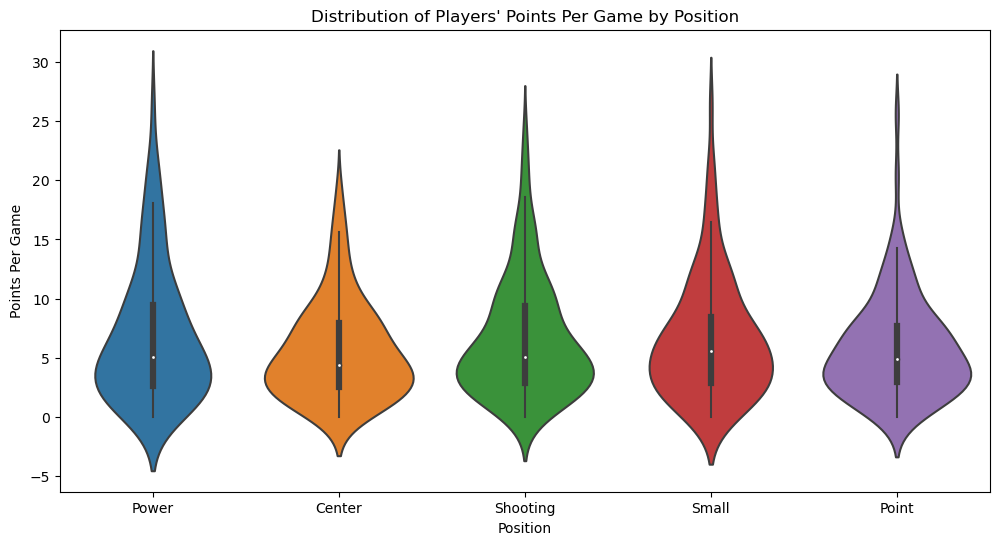

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

merged_df['Per Game.1'] = pd.to_numeric(merged_df['Per Game.1'], errors='coerce')
# Specify the positions you want to include
selected_positions = ['Point', 'Shooting', 'Small', 'Power', 'Center']

# Filter the DataFrame based on selected positions
filtered_df = merged_df[merged_df['position'].isin(selected_positions)]

plt.figure(figsize=(12, 6))
sns.violinplot(x='position', y='Per Game.1', data=filtered_df)
plt.title('Distribution of Players\' Points Per Game by Position')
plt.xlabel('Position')
plt.ylabel('Points Per Game')
plt.show()


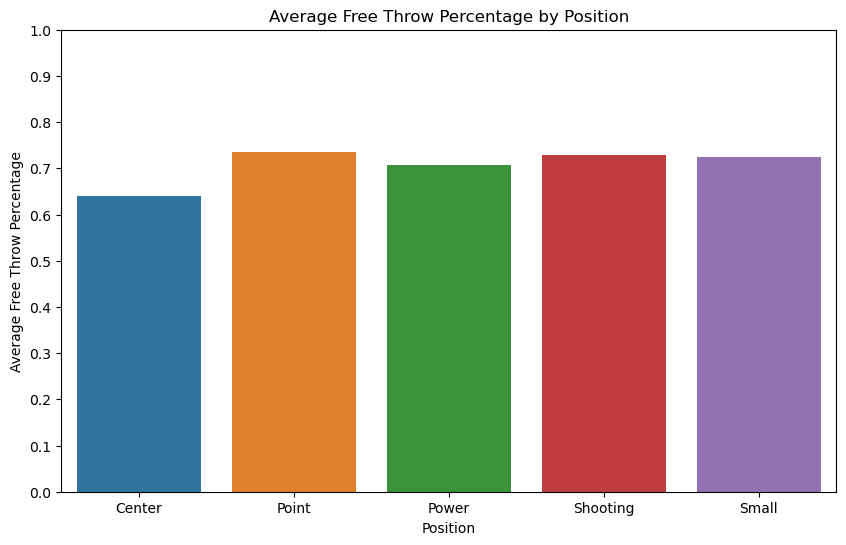

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Shooting.2' column to numeric
merged_df['Shooting.2'] = pd.to_numeric(merged_df['Shooting.2'], errors='coerce')

# Filter the DataFrame based on selected positions
selected_positions = ['Point', 'Shooting', 'Small', 'Power', 'Center']
filtered_avg_ft_percentage = avg_ft_percentage[avg_ft_percentage['position'].isin(selected_positions)]

# Create a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='position', y='Shooting.2', data=filtered_avg_ft_percentage)
plt.title('Average Free Throw Percentage by Position')
plt.xlabel('Position')
plt.ylabel('Average Free Throw Percentage')

# Set y-axis limits and ticks with increments of 0.1
plt.ylim(0, 1)
plt.yticks([i/10 for i in range(11)])

plt.show()



